In [1]:
# Importing libraries for data handling, visualization, preprocessing, and model evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Importing machine learning models: Logistic Regression, Random Forest, XGBoost, and SVM
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

In [2]:
# Load dataset
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.shape

(284807, 31)

In [3]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Generate summary statistics of the dataset (mean, std, min, max, quartiles)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

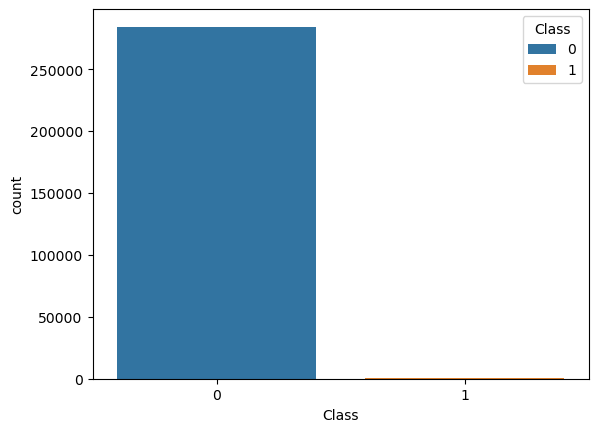

In [6]:
# Plot the distribution of the target variable 'Class' with counts for each class
#hue is used to add a categorical separation (color grouping) to your plots.
sns.countplot(x=df.Class, hue=df.Class)

C:\Users\SASI REKHA\AppData\Local\Temp\ipykernel_11136\939272996.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Amount) #displot → high-level function (for multiple subplots / facets)


<Axes: xlabel='Amount', ylabel='Density'>

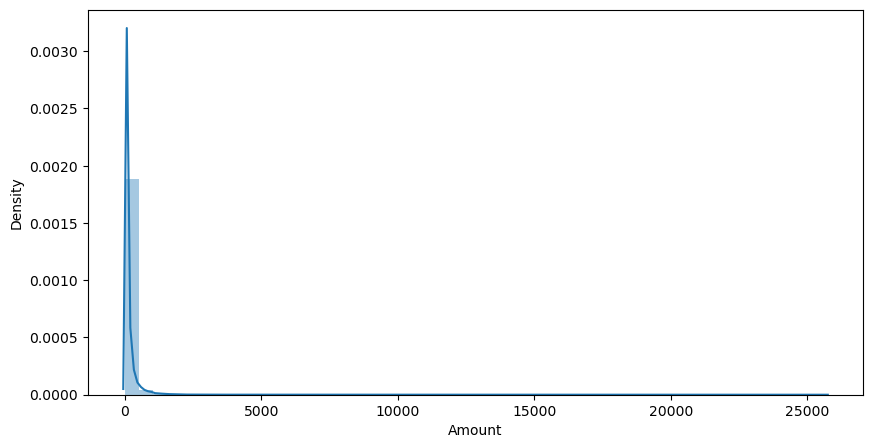

In [10]:
#displot → high-level function (for multiple subplots / facets)
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount) #displot → high-level function (for multiple subplots / facets)

In [7]:
# Create custom bins for the 'Amount' feature and generate corresponding bin labels
df['Amount-Bins'] = ''
#Now, let's set the bins and their labels.
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)
    bin_labels = []
    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1
    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    return bins, bin_labels

In [8]:
bins, bin_labels = make_bins(df.Amount, size=10)

Now, adding bins in the column Amount-Bins.

In [9]:
# Apply the bins to the 'Amount' column and display the first few binned values
bins, bin_labels = make_bins(df.Amount, size=10)
df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


In [10]:
df['Amount-Bins'].value_counts()

Amount-Bins
0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
14272 to 17127         0
19982 to 22836         0
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

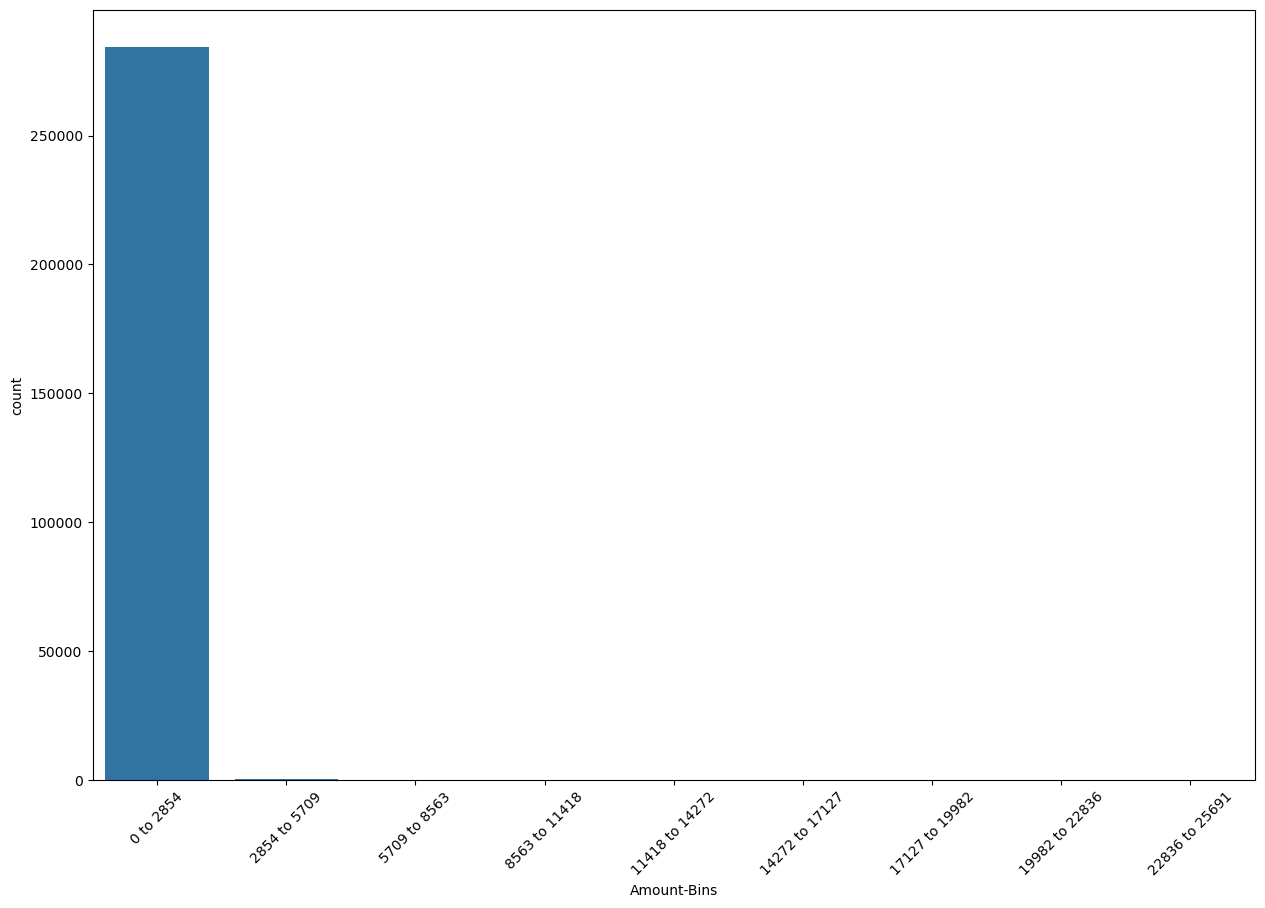

In [11]:
# Visualize the count of transactions in each 'Amount-Bins' category
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

Since, count of values of Bins other than '0 to 2854' are difficult to view. Let's not insert the first one.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

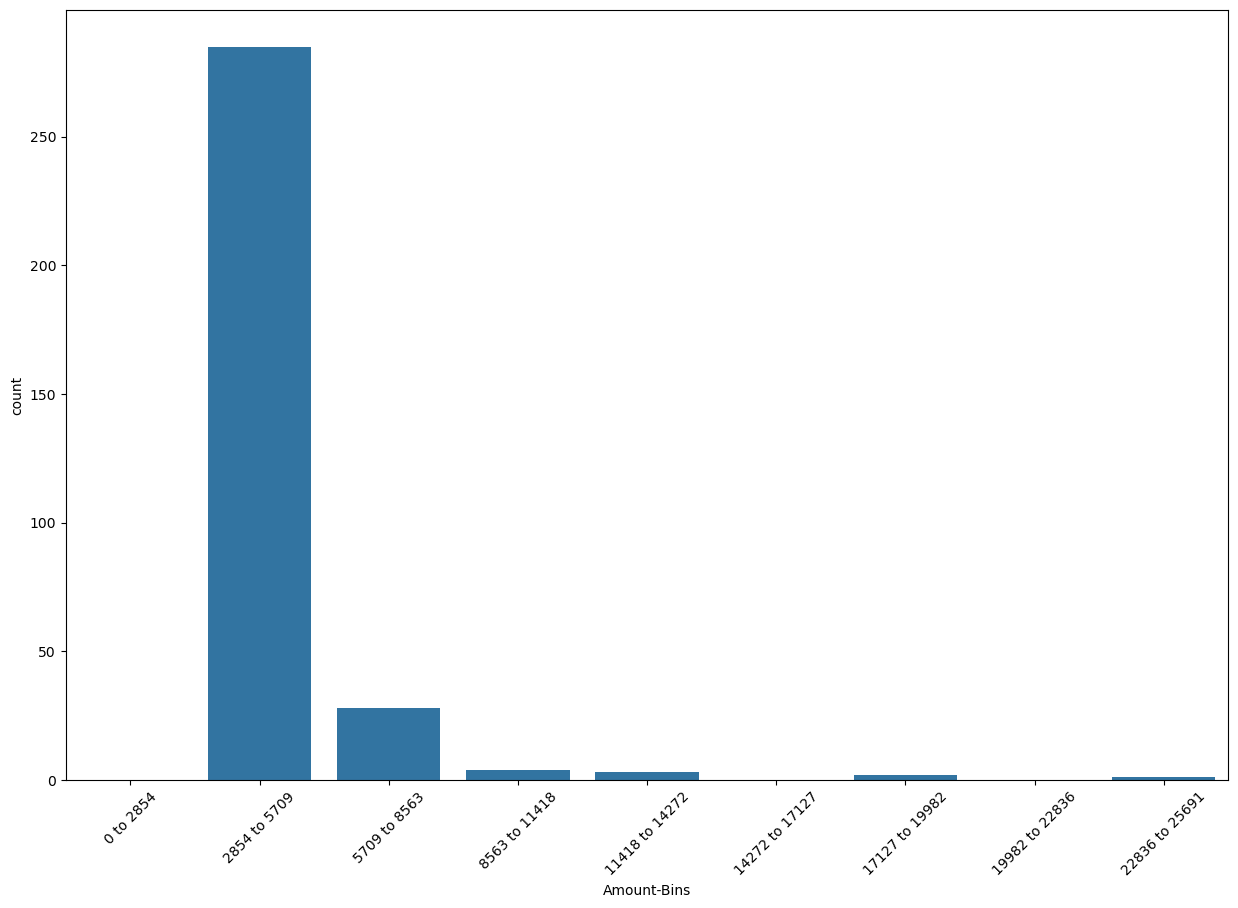

In [16]:
# Plot counts of 'Amount-Bins' excluding the first bin to focus on other ranges
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df[~(df['Amount-Bins'] == '0 to 2854')])
plt.xticks(rotation=45)

We can see that mostly the amount is between 0 and 2854 euros.

In [12]:
# One-hot encode the 'Amount-Bins' categorical feature for model input
df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])

In [13]:
# Separate features (X) and target variable (Y) for modeling
X = df.drop(["Class", "Amount-Bins"], axis=1)
Y = df["Class"]

In [14]:
X.shape, Y.shape

((284807, 30), (284807,))

In [15]:
# Split the dataset into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 30) (199364,)
(85443, 30) (85443,)


In [16]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [17]:
# Training the algorithm
lr_model.fit(xtrain, ytrain)

C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [19]:
# Predictions on training and testing data
lr_pred_train = lr_model.predict(xtrain)
lr_pred_test = lr_model.predict(xtest)

In [20]:
tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,91,45
Not Fraud,26,85281


<Axes: >

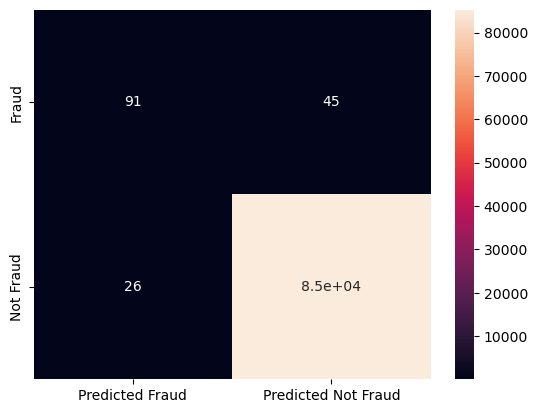

In [21]:
sns.heatmap(conf_matrix, annot=True)

In [25]:
pip install xgboost

In [28]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# Models (optimized for speed)
models = {
"Logistic Regression": LogisticRegression(max_iter=1000),
"Random Forest": RandomForestClassifier(n_estimators=100, random_state=50),
"XGBoost": XGBClassifier(tree_method='hist', predictor='predictor', use_label_encoder=False, eval_metric='logloss', random_state=42),
"Linear SVM": CalibratedClassifierCV(LinearSVC(random_state=42, max_iter=5000)) # calibrated for probabilities
}

C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SASI REKHA\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:35:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


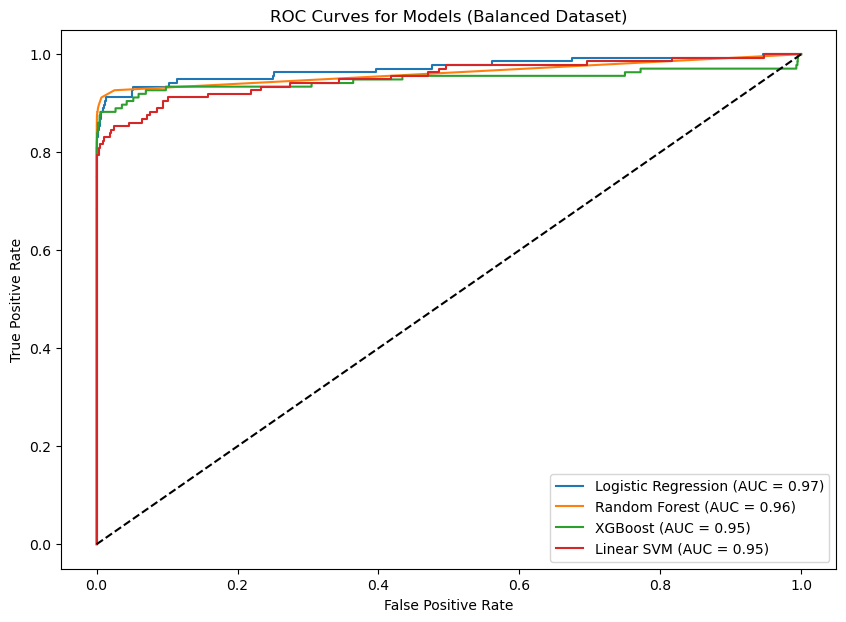


Model Performance Summary:

                     Precision    Recall  F1-Score   AUC-ROC
Logistic Regression   0.834862  0.669118  0.742857  0.970482
Random Forest         0.924370  0.808824  0.862745  0.961936
XGBoost               0.916667  0.808824  0.859375  0.948449
Linear SVM            0.835616  0.448529  0.583732  0.953661


In [29]:
# Store results
results = {}

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Train
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    y_proba = model.predict_proba(xtest)[:, 1]

    # Metrics
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    auc = roc_auc_score(ytest, y_proba)

    results[name] = {"Precision": precision, "Recall": recall, "F1-Score": f1, "AUC-ROC": auc}

    # ROC curve
    fpr, tpr, _ = roc_curve(ytest, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models (Balanced Dataset)")
plt.legend()
plt.show()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:\n")
print(results_df)